# Importing libraries 

import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten

# Loading the Datasets 

In [6]:
x_train = np.loadtxt('input.csv', delimiter = ",")
y_train = np.loadtxt('labels.csv', delimiter = ",")
x_test = np.loadtxt('input_test.csv', delimiter = ",")
y_test = np.loadtxt('labels_test.csv', delimiter = ",")

# Reshaping Datasets

In [11]:
x_train = x_train.reshape(len(x_train) , 100,100,3)
y_train = y_train.reshape(len(y_train) , 1)
x_test = x_test.reshape(len(x_test) , 100,100,3)
y_test = y_test.reshape(len(y_test) , 1)

x_train = x_train/255.0
x_test = x_test/255.0

# Printing the shape of the datasets 

In [9]:
print("Shape of xtrain: ", x_train.shape)
print("Shape of ytrain: ", y_train.shape)
print("Shape of xtest: ", x_test.shape)
print("Shape of ytest: ", y_test.shape)

Shape of xtrain:  (2000, 100, 100, 3)
Shape of ytrain:  (2000, 1)
Shape of xtest:  (400, 100, 100, 3)
Shape of ytest:  (400, 1)


In [12]:
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

# Printing the images

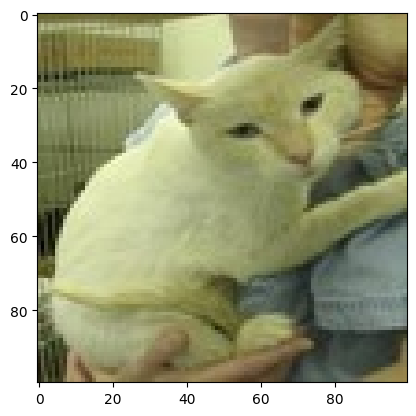

In [32]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx , :])
plt.show()

# Building the CNN and NN

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Adding parameters

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
model.fit(x_train, y_train, epochs=5, batch_size=64) # Starting the training

Epoch 1/5


32/32 [==============================] - 4s 89ms/step - loss: 0.7430 - accuracy: 0.4855
Epoch 2/5
32/32 [==============================] - 3s 82ms/step - loss: 0.6885 - accuracy: 0.5535
Epoch 3/5
32/32 [==============================] - 3s 83ms/step - loss: 0.6525 - accuracy: 0.6135
Epoch 4/5
32/32 [==============================] - 3s 84ms/step - loss: 0.5928 - accuracy: 0.6960
Epoch 5/5
32/32 [==============================] - 3s 85ms/step - loss: 0.5304 - accuracy: 0.7410


In [37]:
model.evaluate(x_test, y_test) # Evaluating x_test, y_test

13/13 [==============================] - 0s 12ms/step - loss: 0.6799 - accuracy: 0.6400


[0.6798975467681885, 0.6399999856948853]

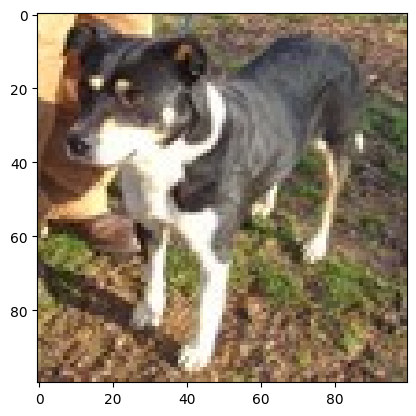

1/1 [==============================] - 0s 21ms/step
[[0.30262086]]
[[False]]
 our model says its a: dog


In [88]:
idx2 = random.randint(0, len(x_test))
plt.imshow(x_test[idx2 , :])
plt.show()
y_pred = model.predict(x_test[idx2, :].reshape(1,100,100,3))

y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print(' our model says its a:', pred)